In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot


conferencedata = pd.read_csv('NCAAF Team Leaders_2018.csv')
rawdata2018 = pd.read_csv('2018.csv')
rawdata2018 = pd.concat([rawdata2018, conferencedata['conference']], axis=1)
display(rawdata2018.head())

csq=chi2_contingency(pd.crosstab(rawdata2018['AP_top_25'], rawdata2018['conference_categorical']))
print("Relationship between top 25 and conference P-value: ",csq[1])

#print(ncaaf['FumblesTouchdowns'].sum())
#ncaaf = ncaaf.drop(columns=['FumblesRecovered', 'FumblesTouchdowns', 'fumblesrecovered2', 'fumblestouchdowns2'])
cols = [c for c in rawdata2018.columns if c.lower()[:4] != 'team' and c.lower()[:4] != 'play' and c.lower()[:4] != 'espn' and c.lower()[:4] != 'conf' and c != 'r']
data2018 = rawdata2018[cols]
data2018 = data2018.rename(columns = {data2018.columns[43]: "y"})
display(data2018.head()) #all numerical
print(data2018.columns)
print(data2018['y'].describe())
print(data2018['QBRating'].describe())

,team,Completions,Attempts,PassingYards,CompletionPercentage,AverageCompletion,LongestCompletion,QBTouchdowns,Interceptions,Sacks,...,sacksyardslost2,passesdefended2,interceptions2,interceptionyards2,longestinterception2,interceptiontouchdowns2,fumblesforced2,conference_categorical,AP_top_25,conference
0,Air Force,48,78,844,61.537998,10.821,69,4,3,5,...,5,1,3,0,0,0,0,9,0,Mountain West Conference
1,Akron,178,342,2329,52.047001,6.810,56,15,8,31,...,0,3,4,149,147,2,1,8,0,Mid-American Conference
2,Alabama,245,355,3966,69.014000,11.172,81,43,6,13,...,0,5,3,71,38,1,1,11,1,Southeastern Conference
3,Appalachian State,159,254,2039,62.598000,8.028,90,21,6,14,...,0,5,4,113,64,1,0,12,0,Sun Belt Conference
4,Arizona,170,302,2530,56.291000,8.377,75,26,8,14,...,0,3,3,63,62,1,0,10,0,Pac-12 Conference


Relationship between top 25 and conference P-value:  0.061018655720283685


,Completions,Attempts,PassingYards,CompletionPercentage,AverageCompletion,LongestCompletion,QBTouchdowns,Interceptions,Sacks,SackYardsLost,...,totaltackles2,sacks2,sacksyardslost2,passesdefended2,interceptions2,interceptionyards2,longestinterception2,interceptiontouchdowns2,fumblesforced2,y
0,48,78,844,61.537998,10.821,69,4,3,5,-32,...,104,1,5,1,3,0,0,0,0,0
1,178,342,2329,52.047001,6.810,56,15,8,31,-199,...,75,0,0,3,4,149,147,2,1,0
2,245,355,3966,69.014000,11.172,81,43,6,13,-110,...,60,0,0,5,3,71,38,1,1,1
3,159,254,2039,62.598000,8.028,90,21,6,14,-78,...,51,0,0,5,4,113,64,1,0,0
4,170,302,2530,56.291000,8.377,75,26,8,14,-108,...,38,0,0,3,3,63,62,1,0,0


Index(['Completions', 'Attempts', 'PassingYards', 'CompletionPercentage',
       'AverageCompletion', 'LongestCompletion', 'QBTouchdowns',
       'Interceptions', 'Sacks', 'SackYardsLost', 'QBRating', 'Receptions',
       'ReceivingYards', 'AverageReceivingYards', 'LongestReception',
       'ReceivingTouchdowns', 'RushingAttempts', 'RushingYards',
       'AverageRushingYards', 'LongestRush', 'RushingTouchdowns',
       'SoloTackles', 'AssistedTackles', 'TotalTackles', 'Sacks.1',
       'SacksYardsLost', 'PassesDefended', 'Interceptions.1',
       'InterceptionYards', 'LongestInterception', 'InterceptionTouchdowns',
       'FumblesForced', 'solotackles2', 'assistedtackles2', 'totaltackles2',
       'sacks2', 'sacksyardslost2', 'passesdefended2', 'interceptions2',
       'interceptionyards2', 'longestinterception2', 'interceptiontouchdowns2',
       'fumblesforced2', 'y'],
      dtype='object')
count    130.000000
mean       0.192308
std        0.395638
min        0.000000
25%        0.0

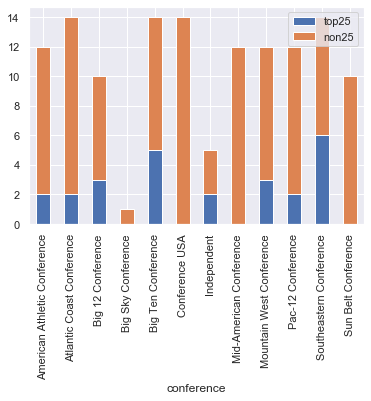

In [47]:
conf = pd.concat([data2018['y'], rawdata2018['conference']], axis=1).groupby('conference').sum()
conf['non25'] = rawdata2018.groupby('conference')['AP_top_25'].count() - conf['y']
conf = conf.rename(columns={"y": "top25"})
#display(conf)
conf.plot.bar(stacked=True)

(0.9831368327140808, 0.10715162754058838)


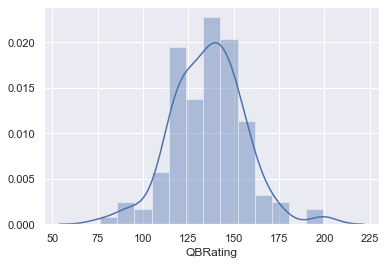

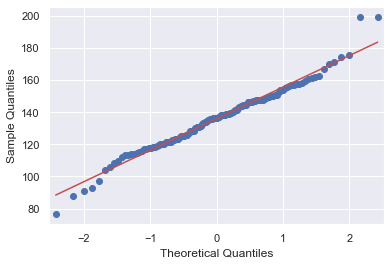

(0.9665281772613525, 0.002681687707081437)


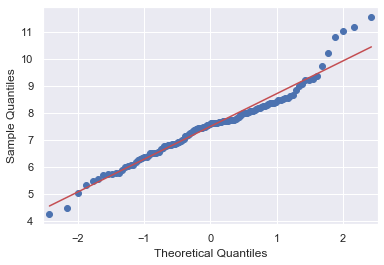

(0.9542575478553772, 0.0002441542746964842)


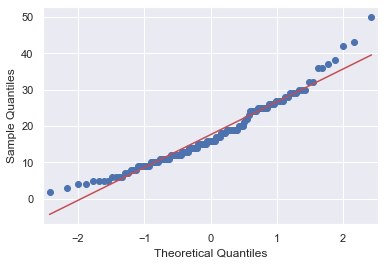

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

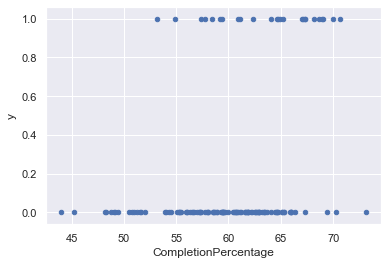

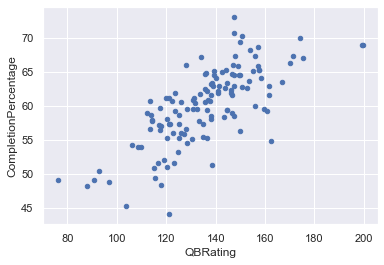

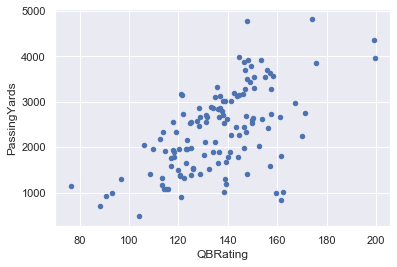

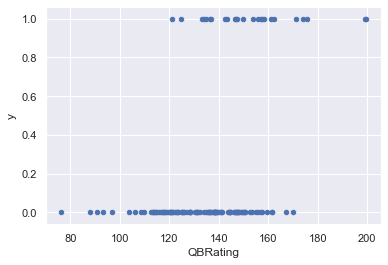

In [27]:
#sns.distplot(data['CompletionPercentage'])
sns.distplot(data2018['QBRating'])
print(shapiro(data2018['QBRating']))
qqplot(data2018['QBRating'], line='s')
plt.show()
print(shapiro(data2018['AverageCompletion']))
qqplot(data2018['AverageCompletion'], line='s')
plt.show()
print(shapiro(data2018['QBTouchdowns']))
qqplot(data2018['QBTouchdowns'], line='s')
plt.show()
data2018.plot.scatter(x='CompletionPercentage', y='y');
data2018.plot.scatter(x='QBRating', y='CompletionPercentage');
data2018.plot.scatter(x='QBRating', y='PassingYards');
data2018.plot.scatter(x='QBRating', y='y');

In [28]:
corrmat2018 = data2018.corr()
#display(corrmat)
#average passing yards (46.4%) and qbrating (48.8%) are the most correlated with whether or not making it to top25

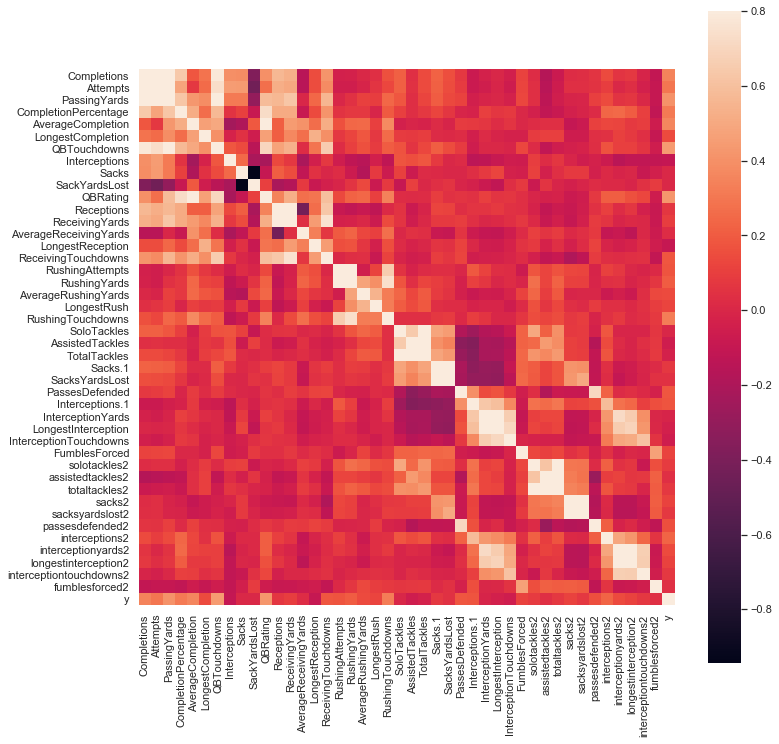

In [29]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat2018, vmax=.8, square=True);

In [30]:
pairs2018 = corrmat2018['y'].abs().sort_values(ascending=False)
pairs2018 = pairs2018[pairs2018!=1]
print(pairs2018[0:5])
print(pairs2018)

QBTouchdowns         0.439608
QBRating             0.420781
PassingYards         0.408534
AverageCompletion    0.360998
Completions          0.344052
Name: y, dtype: float64
QBTouchdowns               0.439608
QBRating                   0.420781
PassingYards               0.408534
AverageCompletion          0.360998
Completions                0.344052
RushingTouchdowns          0.325614
CompletionPercentage       0.315978
Attempts                   0.297411
interceptions2             0.231004
RushingYards               0.203099
ReceivingTouchdowns        0.183028
PassesDefended             0.182274
Interceptions.1            0.175058
RushingAttempts            0.173930
passesdefended2            0.156667
AverageRushingYards        0.144478
interceptionyards2         0.140950
LongestCompletion          0.139173
LongestRush                0.123929
FumblesForced              0.117996
sacks2                     0.117728
longestinterception2       0.117477
Interceptions              0.10294

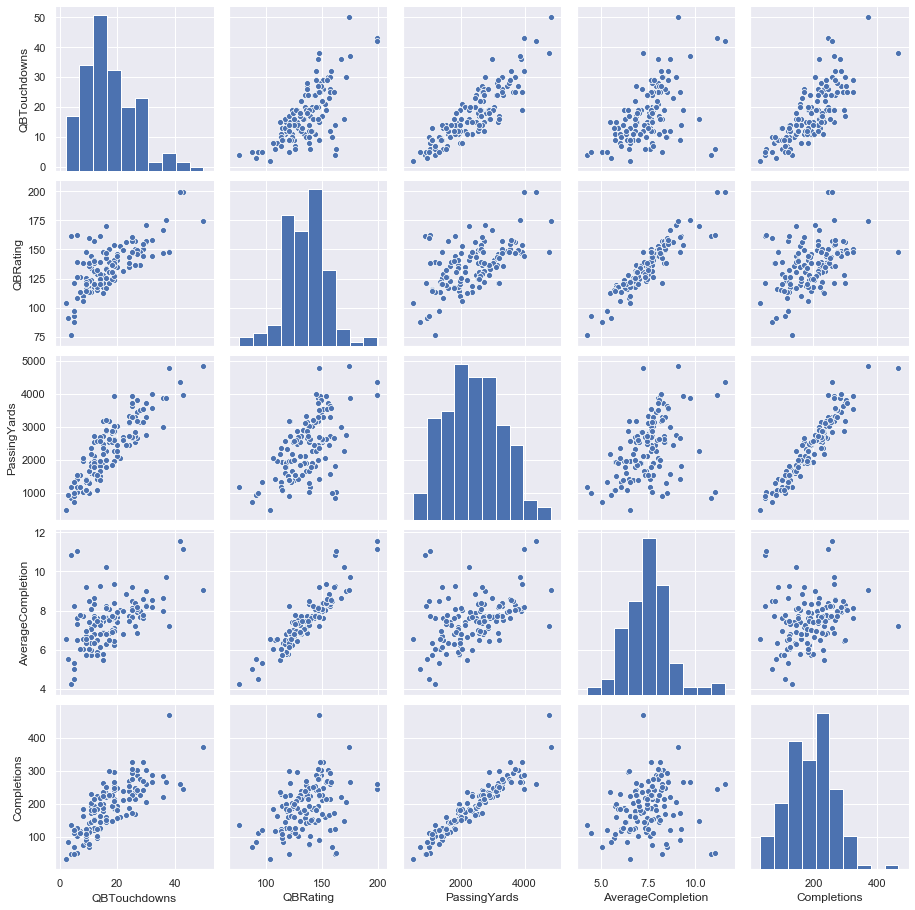

In [31]:
sns.set()
cols = pairs2018[0:5].index
sns.pairplot(data2018[cols], height = 2.5)
plt.show();

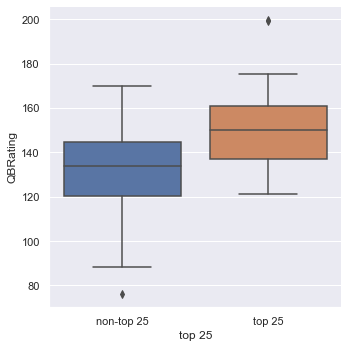

In [32]:
box = pd.concat([data2018['QBRating'], data2018['y']], axis=1)
box = box.rename(columns={"y": "top 25"})
box.loc[(box["top 25"] == 0),"top 25"]='non-top 25'
box.loc[(box["top 25"] == 1),"top 25"]='top 25'
fig = sns.catplot(x="top 25", y='QBRating', kind='box', data=box)

,QBRating,conference
0,161.665482,Mountain West Conference
1,119.046684,Mid-American Conference
2,199.450623,Southeastern Conference
3,152.592667,Sun Belt Conference
4,149.770386,Pac-12 Conference
...,...,...
125,175.485870,Big 12 Conference
126,114.257156,Conference USA
127,146.653625,Mid-American Conference
128,132.480041,Big Ten Conference


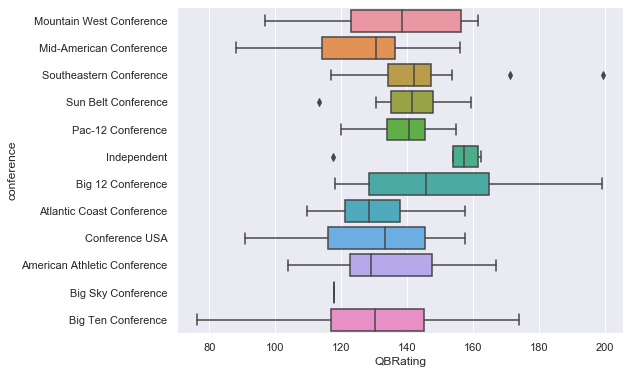

In [48]:
box = pd.concat([data2018['QBRating'], rawdata2018['conference']], axis=1)
display(box)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='QBRating', y="conference", data=box)

In [35]:
rawdata2019 = pd.read_csv('2019.csv')
display(rawdata2019.head())

csq=chi2_contingency(pd.crosstab(rawdata2019['AP_top_25'], rawdata2019['conference_categorical']))
print("Relationship between top 25 and conference P-value: ",csq[1])

#print(ncaaf['FumblesTouchdowns'].sum())
#ncaaf = ncaaf.drop(columns=['FumblesRecovered', 'FumblesTouchdowns', 'fumblesrecovered2', 'fumblestouchdowns2'])
cols = [c for c in rawdata2019.columns if c.lower()[:4] != 'team' and c.lower()[:4] != 'play' and c.lower()[:4] != 'espn' and c.lower()[:4] != 'conf' and c != 'r']
data2019 = rawdata2019[cols]
data2019 = data2019.rename(columns = {data2019.columns[43]: "y"})
display(data2019.head()) #all numerical
print(data2019.columns)
print(data2019['y'].describe())
print(data2019['QBRating'].describe())

,team,Completions,Attempts,PassingYards,CompletionPercentage,AverageCompletion,LongestCompletion,QBTouchdowns,Interceptions,Sacks,...,sacks2,sacksyardslost2,passesdefended2,interceptions2,interceptionyards2,longestinterception2,interceptiontouchdowns2,fumblesforced2,conference_categorical,AP_top_25
0,Air Force,56,111,1316,50.450001,11.856,81,13,6,4,...,0,0,4,3,99,92,1,0,9,1
1,Akron,150,279,1822,53.763000,6.530,87,11,6,43,...,1,8,2,1,64,64,1,0,8,0
2,Alabama,180,252,2840,71.429001,11.270,85,33,3,10,...,0,0,3,4,54,36,0,0,11,1
3,Appalachian State,225,359,2718,62.674000,7.571,73,28,6,18,...,0,0,8,5,54,30,2,1,12,1
4,Arizona,160,266,1954,60.150002,7.346,75,14,11,19,...,0,0,7,4,29,14,0,0,10,0


Relationship between top 25 and conference P-value:  0.07510413466966305


,Completions,Attempts,PassingYards,CompletionPercentage,AverageCompletion,LongestCompletion,QBTouchdowns,Interceptions,Sacks,SackYardsLost,...,totaltackles2,sacks2,sacksyardslost2,passesdefended2,interceptions2,interceptionyards2,longestinterception2,interceptiontouchdowns2,fumblesforced2,y
0,56,111,1316,50.450001,11.856,81,13,6,4,-22,...,18,0,0,4,3,99,92,1,0,1
1,150,279,1822,53.763000,6.530,87,11,6,43,-219,...,138,1,8,2,1,64,64,1,0,0
2,180,252,2840,71.429001,11.270,85,33,3,10,-63,...,59,0,0,3,4,54,36,0,0,1
3,225,359,2718,62.674000,7.571,73,28,6,18,-107,...,45,0,0,8,5,54,30,2,1,1
4,160,266,1954,60.150002,7.346,75,14,11,19,-120,...,47,0,0,7,4,29,14,0,0,0


Index(['Completions', 'Attempts', 'PassingYards', 'CompletionPercentage',
       'AverageCompletion', 'LongestCompletion', 'QBTouchdowns',
       'Interceptions', 'Sacks', 'SackYardsLost', 'QBRating', 'Receptions',
       'ReceivingYards', 'AverageReceivingYards', 'LongestReception',
       'ReceivingTouchdowns', 'RushingAttempts', 'RushingYards',
       'AverageRushingYards', 'LongestRush', 'RushingTouchdowns',
       'SoloTackles', 'AssistedTackles', 'TotalTackles', 'Sacks.1',
       'SacksYardsLost', 'PassesDefended', 'Interceptions.1',
       'InterceptionYards', 'LongestInterception', 'InterceptionTouchdowns',
       'FumblesForced', 'solotackles2', 'assistedtackles2', 'totaltackles2',
       'sacks2', 'sacksyardslost2', 'passesdefended2', 'interceptions2',
       'interceptionyards2', 'longestinterception2', 'interceptiontouchdowns2',
       'fumblesforced2', 'y'],
      dtype='object')
count    131.000000
mean       0.190840
std        0.394471
min        0.000000
25%        0.0

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn import preprocessing

np.random.seed(1)

x_train = data2018.iloc[:,:-1]
#x_data = preprocessing.normalize(x_data, norm='l2')
x_train = preprocessing.scale(x_train)
y_train = data2018.iloc[:,-1]

x_test = data2019.iloc[:,:-1]
x_test = preprocessing.scale(x_test)
y_test = data2019.iloc[:,-1]

#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True)

neuralnet = MLPClassifier(hidden_layer_sizes=(4,2), learning_rate_init=0.01, max_iter=100000).fit(x_train, y_train)
print(confusion_matrix(y_test, neuralnet.predict(x_test)))
print("neural networks accuracy on test:",neuralnet.score(x_test, y_test))

from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print("pre-tune svm accuracy on training:",svm.score(x_train, y_train))
print("pre-tune svm accuracy on test:",svm.score(x_test, y_test))

from sklearn.linear_model import LogisticRegression

logitmodel = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio = 0.5, max_iter=1000000).fit(x_train,y_train)
logitpred = logitmodel.predict(x_test)
print(logitpred)
logitacc = accuracy_score(y_test,logitpred)
print("Logistic Regression Accuracy:",logitacc)
confusion_matrix(y_test,logitpred)

from sklearn.neighbors import KNeighborsClassifier

knnmodel = KNeighborsClassifier().fit(x_train,y_train)
knnpred = knnmodel.predict(x_test)
knnacc = accuracy_score(y_test,knnpred)
print("KNN Accuracy:",knnacc)
confusion_matrix(y_test,knnpred)

from sklearn.naive_bayes import GaussianNB

nbmodel = GaussianNB(var_smoothing=10**(-3)).fit(x_train, y_train)
nbpred = nbmodel.predict(x_test)
nbacc = accuracy_score(y_test,nbpred)
print("Naive Bayes Accuracy:",nbacc)
confusion_matrix(y_test,nbpred)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dtmodeltuned = GridSearchCV(estimator=dt,
                     param_grid={'max_depth': np.arange(1,31)},
                     scoring='roc_auc',
                     cv=5)
dtmodeltuned.fit(x_train, y_train)
y_pred_dt_test = dtmodeltuned.predict(x_test)
print(dtmodeltuned.best_params_)
print("Decision Tree Accuracy:",accuracy_score(y_pred_dt_test, y_test))

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
#rfmodel = rf.fit(x_train, y_train)

rfmodeltuned = GridSearchCV(estimator=rf, param_grid={'max_depth':np.arange(1,31)},
                     cv=5,
                     scoring='roc_auc')
rfmodeltuned.fit(x_train, y_train)

#y_pred_rf = model_rf.predict(x_train)
#print(accuracy_score(y_pred_rf, y_train))
y_pred_rf_test = rfmodeltuned.predict(x_test)
print(rfmodeltuned.best_params_)
print("Random Forest Accuracy:",accuracy_score(y_pred_rf_test, y_test))
display(pd.DataFrame(rfmodeltuned.cv_results_).sort_values(by='rank_test_score',ascending=True).head(10))
#importances = rfmodeltuned.feature_importances_
#print(importances)
#indices = np.argsort(importances)[::-1]
#print("important features:",data.columns[indices])

from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=10000)
adaboost = adaboost.fit(x_train, y_train)
print("AdaBoost Accuracy:",adaboost.score(x_test, y_test))

#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, random_state=0).fit(x_data)

[[94 12]
 [13 12]]
neural networks accuracy on test: 0.8091603053435115
pre-tune svm accuracy on training: 0.9461538461538461
pre-tune svm accuracy on test: 0.816793893129771
[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0]
Logistic Regression Accuracy: 0.816793893129771
KNN Accuracy: 0.8549618320610687
Naive Bayes Accuracy: 0.7862595419847328
{'max_depth': 3}
Decision Tree Accuracy: 0.8091603053435115
{'max_depth': 8}
Random Forest Accuracy: 0.8320610687022901


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.335908,0.107007,0.036530,0.027093,8,{'max_depth': 8},0.895238,0.733333,0.776190,0.704762,0.961905,0.814286,0.098331,1
11,0.190920,0.015072,0.013918,0.003101,12,{'max_depth': 12},0.866667,0.761905,0.771429,0.714286,0.957143,0.814286,0.086871,1
26,0.213712,0.012762,0.015596,0.002735,27,{'max_depth': 27},0.861905,0.709524,0.809524,0.757143,0.923810,0.812381,0.075509,3
18,0.184676,0.006516,0.013240,0.001120,19,{'max_depth': 19},0.923810,0.752381,0.752381,0.657143,0.971429,0.811429,0.117479,4
4,0.565932,0.270572,0.077565,0.061481,5,{'max_depth': 5},0.885714,0.714286,0.809524,0.695238,0.952381,0.811429,0.098312,5
10,0.188528,0.023570,0.013572,0.002284,11,{'max_depth': 11},0.919048,0.757143,0.780952,0.652381,0.942857,0.810476,0.107724,6
22,0.204820,0.019892,0.013236,0.001621,23,{'max_depth': 23},0.914286,0.761905,0.700000,0.695238,0.952381,0.804762,0.108254,7
28,0.212919,0.044503,0.015496,0.005727,29,{'max_depth': 29},0.876190,0.738095,0.790476,0.652381,0.966667,0.804762,0.108797,8
12,0.219141,0.038183,0.015095,0.003886,13,{'max_depth': 13},0.861905,0.761905,0.785714,0.652381,0.961905,0.804762,0.103323,8
20,0.197889,0.010379,0.013528,0.001187,21,{'max_depth': 21},0.885714,0.771429,0.776190,0.633333,0.952381,0.803810,0.109229,10


AdaBoost Accuracy: 0.8396946564885496
